In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
customerDf = pd.read_csv("Mall_Customers.csv")

In [8]:
customerDf.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
13,14,Female,24,20,77
84,85,Female,21,54,57
171,172,Male,28,87,75
116,117,Female,63,65,43
79,80,Female,49,54,42


In [9]:
customerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
customerDf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
customerDf.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
# gives a list of values
X = customerDf.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

In [32]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the no. of Clusters we Want using WCSS cost function
In this method we are trying to find the optimal no. of cluster we need for a specific problem by the WCSS cost for different no. of clusters.
We Also use Elbow graph to choose the Optimal Clusters

## WCSS - within cluster sum of squares
- it is the technique we use find the no. of clusters

In [27]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(
        n_clusters = k, # suggesting how many clusters
        init = 'k-means++', # initialization algorithm for the random centroids
        random_state = 42 # standardizing the randomization of values
    )
    kmeans.fit(X) #only train i.e tries to find optimal centroid and clusters
    wcss.append(kmeans.inertia_) # give wcss values and is stored in a list

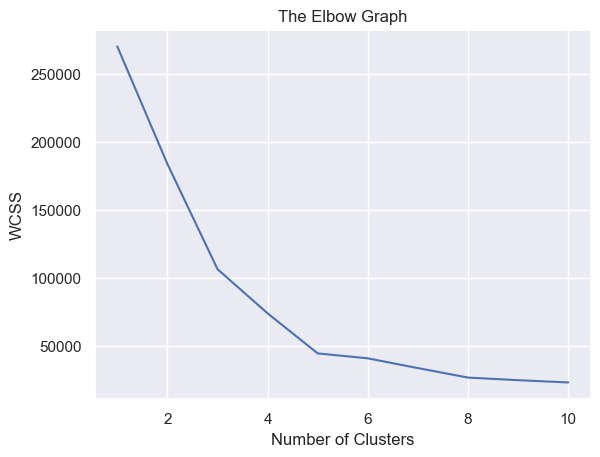

In [28]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

The optimum no. of cluster will be 5

In [29]:
kmeans = KMeans(
        n_clusters = 5, # using the optimum no. of cluster
        init = 'k-means++', # initialization algorithm for the random centroids
        random_state = 0 # standardizing the randomization of values
    )
Y = kmeans.fit_predict(X) # return the cluster the datapoint in X belongs to

In [30]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

# Visualizing the clusters

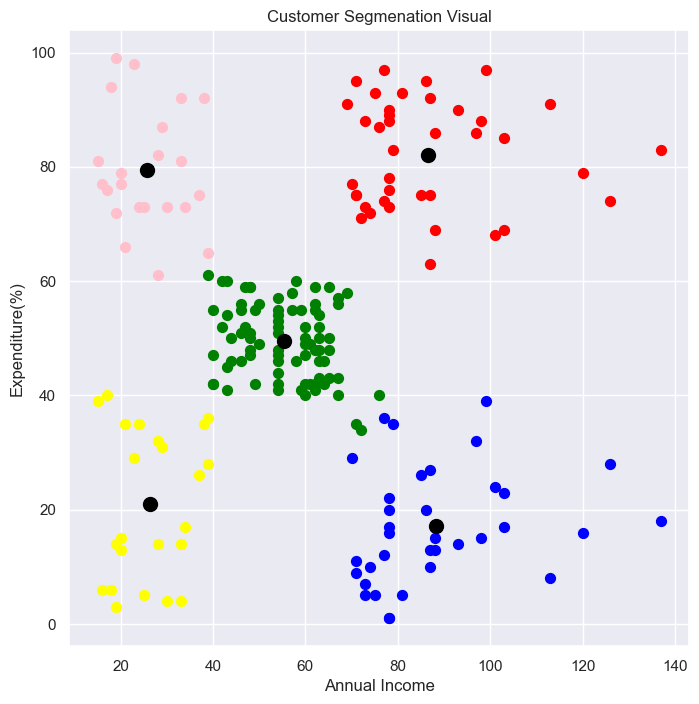

In [36]:
plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0,0], X[Y==0,1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[Y == 1,0], X[Y==1,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y == 2,0], X[Y==2,1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y == 3,0], X[Y==3,1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y==4,1], s = 50, c = 'pink', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c= 'black', label = "Centroids")
plt.title("Customer Segmenation Visual")
plt.xlabel("Annual Income")
plt.ylabel("Expenditure(%)")
plt.show()

# Observation
- we can see people who:
  - Spend more but Income is less - pink
  - Spend more and Income is high - Red
  - Spend less and Income is less - yellow
  - Spend less but Income is high - Blue
  - Spend optimally - Green